In [55]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchviz import make_dot

In [3]:
# torchのテンソルクラスのインすランスを生成している
x1 = torch.ones(5)
print(x1)
x2 = x1.data.numpy()
print(x2)

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]


In [5]:
# 参照渡しになっているため，x1の値を変更するとx2の値も変更される
x1[1] = -1
print(x1)
print(x2)

tensor([ 1., -1.,  1.,  1.,  1.])
[ 1. -1.  1.  1.  1.]


In [6]:
x1 = torch.ones(5)
x2 = x1.data.numpy().copy()
x1[1] = -1
print(x1)
print(x2)

tensor([ 1., -1.,  1.,  1.,  1.])
[1. 1. 1. 1. 1.]


In [9]:
# 関数を引数にとる関数
# 数値微分
def fdiff(f):
    def diff(x):
        h = 1e-6
        return (f(x+h) - f(x-h)) / (2*h)
    return diff

def f(x):
    return x**2 + 2*x + 1

diff = fdiff(f)
print(diff(3))

8.000000002006402


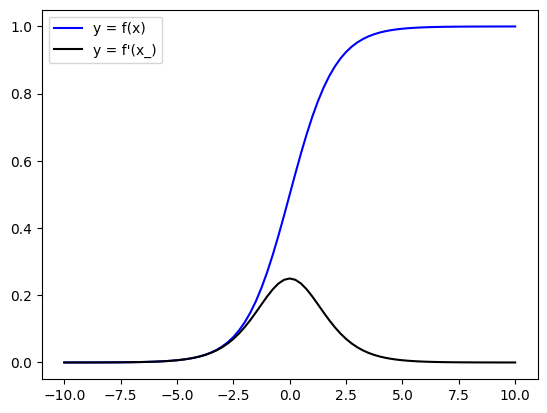

In [18]:
# シグモイド関数の数値微分
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

diff_sigmoid = fdiff(sigmoid)

x = np.arange(-10, 10.1, 0.25)
y = sigmoid(x)
dy = diff_sigmoid(x)

plt.plot(x, y, label=r'y = f(x)', c='b')
plt.plot(x, dy, label=r"y = f'(x_)", c='k')
plt.legend()

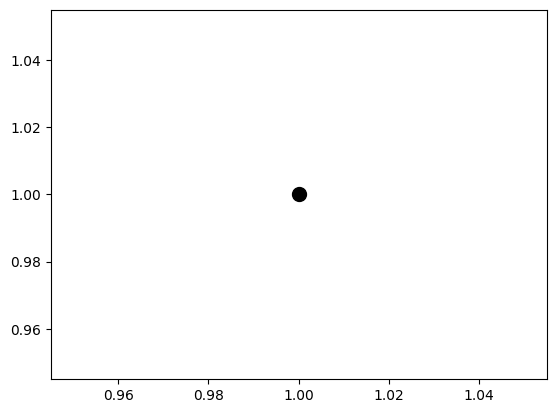

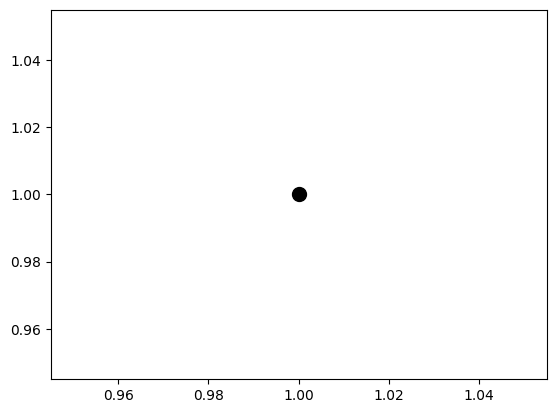

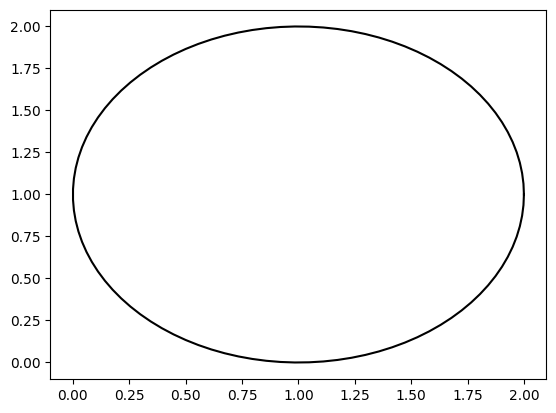

In [24]:
# クラスの継承
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def draw(self):
        plt.plot(self.x, self.y, marker='o', markersize=10, c='k')

point = Point(1, 1)
point.draw()
plt.show()

class Circle1(Point):
    def __init__(self, x, y, r):
        super().__init__(x, y)
        self.r = r

circle1 = Circle1(1, 1, 1)
circle1.draw()
plt.show()

class Circle2(Point):
    def __init__(self, x, y, r):
        super().__init__(x, y)
        self.r = r
    def draw(self):
        theta = np.linspace(0, 2*np.pi, 100)
        x = self.x + self.r * np.cos(theta)
        y = self.y + self.r * np.sin(theta)
        plt.plot(x, y, c='k')

circle2 = Circle2(1, 1, 1)
circle2.draw()
plt.show()

In [25]:
# クラスのインスタンスを関数として使う
class H:
    def __call__(self, x):
        return x**2 + 2*x + 1
    
h = H()
print(h(3))

16


In [31]:
# 0階テンソル
r0 = torch.tensor(1.0).float()  # 末尾にfloat()をつけることでfloat64型からfloat32型に変換，これをしないと機械学習のライブラリ使用時にエラーが発生する
print(type(r0))
print(r0.dtype)
print(r0.shape)
print(r0.data)  # テンソルの中身を取り出す

<class 'torch.Tensor'>
torch.float32
torch.Size([])
tensor(1.)


In [30]:
# 1階テンソル
r1_np = np.array([1, 2, 3, 4, 5])
print(r1_np.shape)

r1 = torch.tensor(r1_np).float()
print(r1.dtype)
print(r1.shape)
print(r1.data)


(5,)
torch.float32
torch.Size([5])
tensor([1., 2., 3., 4., 5.])


In [33]:
# 2階テンソル
r2_np = np.array([[1, 5, 6], [4, 3, 2]])
print(r2_np.shape)

r2 = torch.tensor(r2_np).float()
print(r2.dtype)
print(r2.data)

(2, 3)
torch.float32
tensor([[1., 5., 6.],
        [4., 3., 2.]])


In [34]:
# 3階テンソル
torch.manual_seed(123)
r3 = torch.randn((3, 2, 2))
print(r3.shape)
print(r3.data)

torch.Size([3, 2, 2])
tensor([[[-0.1115,  0.1204],
         [-0.3696, -0.2404]],

        [[-1.1969,  0.2093],
         [-0.9724, -0.7550]],

        [[ 0.3239, -0.1085],
         [ 0.2103, -0.3908]]])


In [36]:
# 4階テンソル
torch.manual_seed(123)
r4 = torch.randn((2, 3, 2, 2))
print(r4.shape)
print(r4.data)

torch.Size([2, 3, 2, 2])
tensor([[[[ 0.3374, -0.1778],
          [-0.3035, -0.5880]],

         [[ 0.3486,  0.6603],
          [-0.2196, -0.3792]],

         [[-0.1606, -0.4015],
          [ 0.6957, -1.8061]]],


        [[[ 1.8960, -0.1750],
          [ 1.3689, -1.6033]],

         [[-0.7849, -1.4096],
          [-0.4076,  0.7953]],

         [[ 0.9985,  0.2212],
          [ 1.8319, -0.3378]]]])


In [38]:
r5 = r1.long()
print(r5.dtype)
print(r5)

torch.int64
tensor([1, 2, 3, 4, 5])


In [39]:
# 2階化
r6 = r3.view(3, -1)
print(r6.shape)
print(r6.data)

torch.Size([3, 4])
tensor([[-0.1115,  0.1204, -0.3696, -0.2404],
        [-1.1969,  0.2093, -0.9724, -0.7550],
        [ 0.3239, -0.1085,  0.2103, -0.3908]])


In [41]:
# 1階化
r7 = r3.view(-1)
print(r7.shape)
print(r7.data)

torch.Size([12])
tensor([-0.1115,  0.1204, -0.3696, -0.2404, -1.1969,  0.2093, -0.9724, -0.7550,
         0.3239, -0.1085,  0.2103, -0.3908])


In [42]:
print('require_grad: ', r1.requires_grad)
print('device: ', r1.device)

require_grad:  False
device:  cpu


In [43]:
# item()メソッドはスカラーテンソルにのみ有効
item = r0.item()
print(type(item))
print(item)

<class 'float'>
1.0


In [46]:
# max()メソッドはテンソルの最大値を返す
print(r2)
print(r2.max())
print(r2.min())
print(r2.mean())

tensor([[1., 5., 6.],
        [4., 3., 2.]])
tensor(6.)
tensor(1.)
tensor(3.5000)


In [49]:
# torch.max関数
# 第2引数は軸の向き
print(torch.max(r2, 0))
print(torch.max(r2, 1))
print(torch.max(r2, 1)[1])  # 最大値のインデックスのみを取得

torch.return_types.max(
values=tensor([4., 5., 6.]),
indices=tensor([1, 0, 0]))
torch.return_types.max(
values=tensor([6., 4.]),
indices=tensor([2, 0]))
tensor([2, 0])


In [50]:
# numpy化
r2_np = r2.data.numpy()
print(type(r2_np))
print(r2_np)

<class 'numpy.ndarray'>
[[1. 5. 6.]
 [4. 3. 2.]]


tensor([-2.0000, -1.7500, -1.5000, -1.2500, -1.0000, -0.7500, -0.5000, -0.2500,
         0.0000,  0.2500,  0.5000,  0.7500,  1.0000,  1.2500,  1.5000,  1.7500,
         2.0000], requires_grad=True)
tensor([10.0000,  8.1250,  6.5000,  5.1250,  4.0000,  3.1250,  2.5000,  2.1250,
         2.0000,  2.1250,  2.5000,  3.1250,  4.0000,  5.1250,  6.5000,  8.1250,
        10.0000], grad_fn=<AddBackward0>)


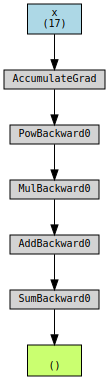

tensor([-8., -7., -6., -5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,
         6.,  7.,  8.])
tensor([-16., -14., -12., -10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,   4.,   6.,
          8.,  10.,  12.,  14.,  16.])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


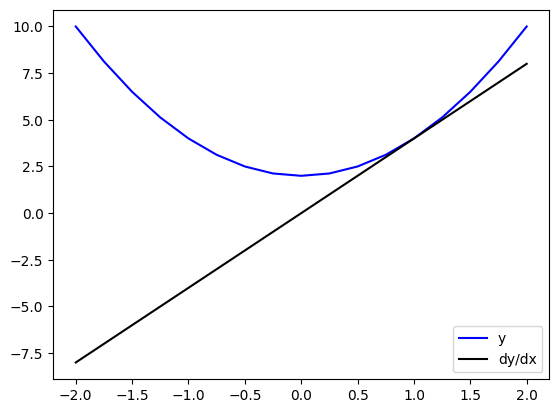

In [64]:
# 自動微分の確認
# 2次関数の微分
x_np = np.arange(-2, 2.1, 0.25)
x = torch.tensor(x_np, requires_grad=True, dtype=torch.float32)
print(x)

y = 2 * x**2 + 2
print(y)

# 勾配計算のために，sum()メソッドを使ってスカラー値に変換
# この処理をしないと勾配計算ができない
# sum()メソッドを各要素で微分した値は1なので，yの勾配は2xになる
z = y.sum()

g = make_dot(z, params={'x': x})
display(g)

# 自動微分の可視化結果の見方
# AccumulateGradは勾配を蓄積するための変数
# - この変数はbackward()メソッドを実行すると計算される
# PowBackward0は2乗を表す
# MulBackward0は2を掛けることを表す
# AddBackward0は2を足すことを表す
# このように，自動微分の可視化結果を見ることで，どのような計算が行われているかを確認することができる

# 勾配計算
z.backward()

# 勾配の取得
print(x.grad)

plt.plot(x.data, y.data, c='b', label='y')
plt.plot(x.data, x.grad, c='k', label='dy/dx')
plt.legend()

# 勾配の初期化をせずに再度勾配計算を行うと，勾配が蓄積される
y = 2 * x**2 + 2
z = y.sum()
z.backward()
print(x.grad)

# 勾配の初期化
x.grad.zero_()
print(x.grad)

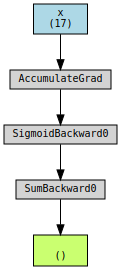

tensor([0.1050, 0.1261, 0.1491, 0.1731, 0.1966, 0.2179, 0.2350, 0.2461, 0.2500,
        0.2461, 0.2350, 0.2179, 0.1966, 0.1731, 0.1491, 0.1261, 0.1050])


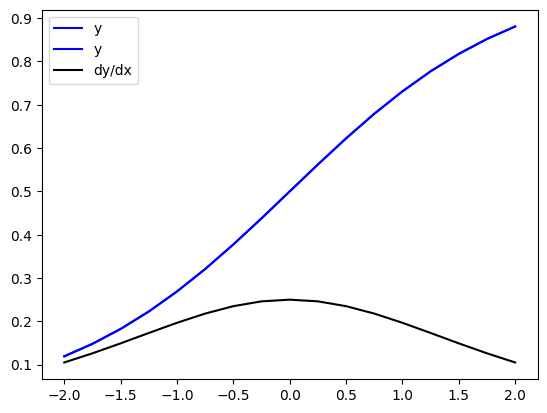

In [67]:
# シグモイド関数
sigmoid = torch.nn.Sigmoid()
y = sigmoid(x)
plt.plot(x.data, y.data, c='b', label='y')
z = y.sum()
g = make_dot(z, params={'x': x})
display(g)

z.backward()
print(x.grad)

plt.plot(x.data, y.data, c='b', label='y')
plt.plot(x.data, x.grad, c='k', label='dy/dx')
plt.legend()